# Final Project - Nobel Prize Winners

<i> Group members: Bhupinder Jagwani, Qurat Ul Ain Syeda, Summer (Yong) Zhao</i>

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv("nobelprize_kaggle.csv")
df.head(2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France


### A) CLEANING DATASET:

1) Removed space from col name and replace with "_" and reordered column names

2) Dropped the following columns:
- Motivation
- Organization_City      
- Organization_Country    
- Death_Date        
- Death_City            
- Death_Country
- Laureate_Type
- Birth_City
- Prize_Share

3) Fixed 4 records where individuals where misclassified as organizations

4) Dropped records where Laureate Type = "Organization" records (26 records).

5) Removed records where Laureate ID was duplicated, retained only first instance (881 unique records retained) 

6) Birth_Date: Dropped records where Birth_Date = NaN  (2 records)      
              
       
7) Added the following columns
- Birth_Year: Extract year from Birth_Date
- Age: Subtract Birth_Year from Year to get age of recepient when awarded
- Decade: Used the .apply method on Year column to get the Decade for each record


Cleaned dataset size =  is 879 x 11


In [31]:
#1-2 Renaming and re_ordering columns
new_names = df.columns.to_list()
new_names = [x.replace(" ", "_") for x in new_names] 
df.columns = new_names
df = df[['Laureate_ID','Full_Name','Year', 'Category', 'Prize', 'Motivation', 'Prize_Share', 
       'Laureate_Type', 'Birth_Date', 'Birth_City',
       'Birth_Country', 'Sex', 'Organization_Name', 'Organization_City',
       'Organization_Country', 'Death_Date', 'Death_City', 'Death_Country']]
#2 Dropping columns irrelevant to our analsysis
df.drop(columns = ['Motivation', 'Organization_Name', 'Organization_City',
       'Organization_Country', 'Death_Date', 'Death_City', 'Death_Country', 'Birth_City', 'Prize_Share'], inplace = True)

In [32]:
#3 Fixed the incorrect classification of individual laureates as organizations.
index = df[(df.Laureate_Type == "Organization") & ((df.Sex == "Male") | (df.Sex == "Female"))].index.to_list()
df.loc[index,"Laureate_Type"]= "Individual"
#4 Removing Laureate Type = "Organization" records from dataset as analysis would focus Laureate Type = "Individuals"
df.drop(labels = df[df.Laureate_Type == "Organization"].index, inplace = True)
df.drop(columns = "Laureate_Type", inplace = True)

In [33]:
#5 Removed laureates records that were duplicated
df.drop_duplicates(subset= 'Laureate_ID', keep='first', inplace = True)
df.sort_values(by = "Laureate_ID", inplace = True)

In [34]:
#6 Removed laureate records where "Birth_Date" is NaN
df.drop(labels = df[df.Birth_Date.isna()].index, inplace = True)

In [35]:
#7 Adding columns relevant to our analysis: Birth_Year, Age, Decade
#Extracting the birth year of laureates
Birth_Year = df.Birth_Date.to_list()
Birth_Year = [x[0:4] for x in Birth_Year]
df['Birth_Year'] = Birth_Year

#Calculating age of laureates when they received their awards
df['Age_Awarded'] = df.Year - df.Birth_Year.astype(int)

#Calculating the decade based on year awarded
df['Decade'] = df.Year.apply(lambda i: (i // 10 )* 10)

### About dataset:

<b>Description:</b> The Nobel Prize was established in 1895 by Swedish inventor Alfred Nobel and first awarded in 1901. It recognizes people in the fields of Physics, Chemistry, Physiology or Medicine, Literature, Peace, and Economics. This dataset shows all Nobel Prize Laureates from the award's inception in 1901 through October 2016.

<b>Column Details:</b> 
<li>Laureate_ID - Unique identifier assigned to each laureate</li>
<li>Full_Name - Legal name of laureate</li>
<li>Year - The year prize awarded</li>
<li>Category - The laureate's field</li>
<li>Prize - Name of the award</li>
<li>Birth_Date - The laureate's date of birth (YYYY-MM-DD)</li>
<li>Birth_Country - The laureate's country of birth</li>
<li>Sex - The laureate's sex</li>
<i>Calculated fields:</i>
<li>Birth_Year - The laureate's year of birth (YYYY)</li>
<li>Age_Awarded - The laureate's age at time of award</li>
<li>Decade - The decade in which the prize was awarded </li>



In [36]:
df.head()

,Laureate_ID,Full_Name,Year,Category,Prize,Birth_Date,Birth_Country,Sex,Birth_Year,Age_Awarded,Decade
5,1,Wilhelm Conrad Röntgen,1901,Physics,The Nobel Prize in Physics 1901,1845-03-27,Prussia (Germany),Male,1845,56,1900
11,2,Hendrik Antoon Lorentz,1902,Physics,The Nobel Prize in Physics 1902,1853-07-18,Netherlands,Male,1853,49,1900
12,3,Pieter Zeeman,1902,Physics,The Nobel Prize in Physics 1902,1865-05-25,Netherlands,Male,1865,37,1900
17,4,Antoine Henri Becquerel,1903,Physics,The Nobel Prize in Physics 1903,1852-12-15,France,Male,1852,51,1900
18,5,Pierre Curie,1903,Physics,The Nobel Prize in Physics 1903,1859-05-15,France,Male,1859,44,1900


*****

### B) ANALYSIS AND VISUALIZATION:

In [37]:
df2 = df.copy()

In [38]:
#Binarizing the 'Sex' column
df2['Is_Male'] = (df2.Sex == 'Male')* 1
df2.drop(['Sex'], axis=1, inplace=True)

In [39]:
df2.head()

,Laureate_ID,Full_Name,Year,Category,Prize,Birth_Date,Birth_Country,Birth_Year,Age_Awarded,Decade,Is_Male
5,1,Wilhelm Conrad Röntgen,1901,Physics,The Nobel Prize in Physics 1901,1845-03-27,Prussia (Germany),1845,56,1900,1
11,2,Hendrik Antoon Lorentz,1902,Physics,The Nobel Prize in Physics 1902,1853-07-18,Netherlands,1853,49,1900,1
12,3,Pieter Zeeman,1902,Physics,The Nobel Prize in Physics 1902,1865-05-25,Netherlands,1865,37,1900,1
17,4,Antoine Henri Becquerel,1903,Physics,The Nobel Prize in Physics 1903,1852-12-15,France,1852,51,1900,1
18,5,Pierre Curie,1903,Physics,The Nobel Prize in Physics 1903,1859-05-15,France,1859,44,1900,1


*****

#### Finding 1: Disproprtionate number of awards go to men in all categories every decade

In [40]:
sns.set_style('darkgrid')

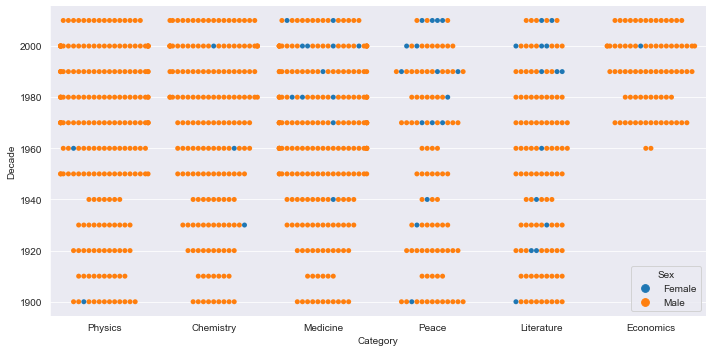

In [41]:
c = sns.catplot(y = 'Decade', hue = 'Is_Male', x = 'Category', data = df2, kind = 'swarm', aspect = 2, legend_out = False)
# Editing legend title
new_title = 'Sex'
c._legend.set_title(new_title)
# Editing legend labels
new_labels = ['Female', 'Male']
for t, l in zip(c._legend.texts, new_labels): t.set_text(l)

#### Insight: 

Here, we can see that 90% of the time, the Nobel prize is awarded to Males. One reason could be because women did not work as much in the 1900s as they do now but there still isn't any significant rise in the number of awards to women. The highest was in 2000s where women recieved 11 Nobel prize awards.

*****

#### Finding 2: Highest number of awards from USA in most categories except Literature.

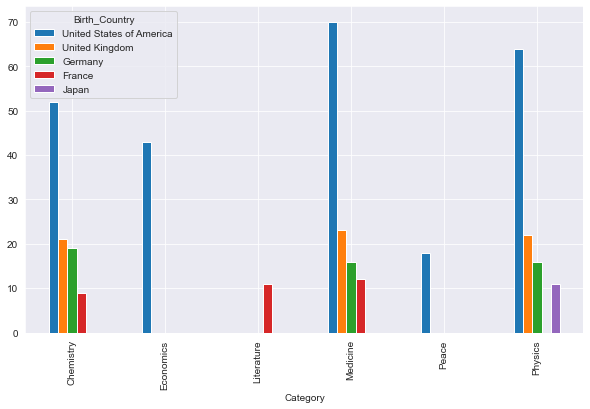

In [42]:
df2.groupby(['Category', 'Birth_Country'])['Prize'].count().nlargest(15).unstack('Birth_Country').plot(kind = 'bar', figsize = ([10,6]))

#### Insight:

From the graph above, we can clearly see that highest number of awards have been awarded to U.S. in each category except in Literature where France recieved highest Nobel Prizes

*****

#### Finding 3: Laureate's age has been an upward trend over the years in all categories, except Peace.

In [43]:
import matplotlib.pyplot as plt

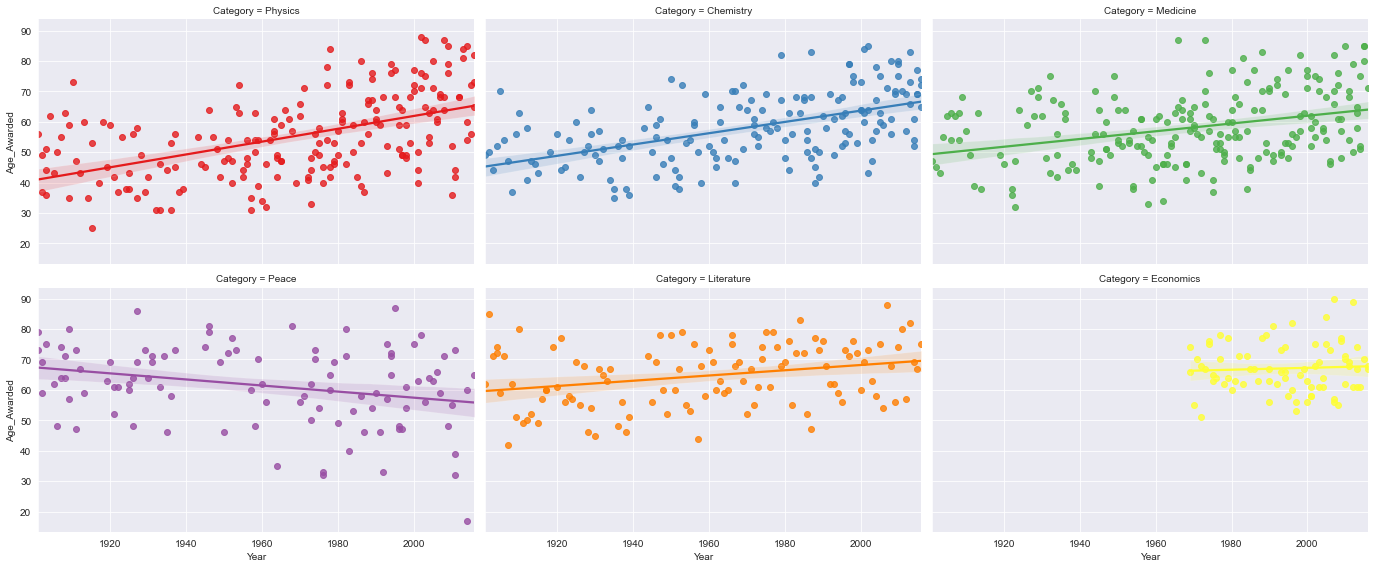

In [44]:
g = sns.FacetGrid(df, col="Category",col_wrap=3, height=4, aspect= 1.6, hue = 'Category', palette = 'Set1')
g.map(sns.regplot, 'Year', 'Age_Awarded');


#### Insight:

The age trend for receiving nobel prize for each Category has seen an upward trend except for peace where there is a downward trend. This could be due to a relatively younger recipients in the 2000s like Malala.

****

### C) MACHINE LEARNING :

We will use the 'Clustering' method to uncover any meaningful patterns in our dataset. We understand that we are limited in both the number of records and the non-numerical data in dataset; however, it will be interesting to see what the model comes up with.

In [45]:
df3 = df.copy()

In [46]:
# Creating dummy columns for 'Sex' and 'Category' columns
df3 = pd.get_dummies(df3,columns = ['Sex', 'Category'])

In [47]:
#Drop all of the non-numericial columns
df3.drop(columns = ['Laureate_ID', 'Full_Name', 'Year', 'Prize', 'Birth_Date', 'Birth_Country', 'Birth_Year', 'Decade'], inplace = True)

In [48]:
df3.head()

,Age_Awarded,Sex_Female,Sex_Male,Category_Chemistry,Category_Economics,Category_Literature,Category_Medicine,Category_Peace,Category_Physics
5,56,0,1,0,0,0,0,0,1
11,49,0,1,0,0,0,0,0,1
12,37,0,1,0,0,0,0,0,1
17,51,0,1,0,0,0,0,0,1
18,44,0,1,0,0,0,0,0,1


In [49]:
from sklearn.cluster import KMeans

In [50]:
#Use KMeans to find 3 clusters
clu = KMeans(n_clusters=3,random_state=0)
clu.fit(df3)

KMeans(n_clusters=3, random_state=0)

In [51]:
#Getting summary information on the clusters' characteristics
df4 = df3.copy()
df4['Cluster'] = clu.labels_
df4.groupby('Cluster').mean()

,Age_Awarded,Sex_Female,Sex_Male,Category_Chemistry,Category_Economics,Category_Literature,Category_Medicine,Category_Peace,Category_Physics
Cluster,,,,,,,,,
0,58.819672,0.040984,0.959016,0.204918,0.101093,0.120219,0.265027,0.114754,0.193989
1,73.846154,0.062271,0.937729,0.164835,0.146520,0.208791,0.175824,0.142857,0.161172
2,44.075000,0.066667,0.933333,0.216667,0.004167,0.050000,0.275000,0.091667,0.362500


<b>Findings:</b>
<li>Among all of the age group, females have a much lower probability to win the Nobel Prize than males</li>
<li>Younger people have higher probability to win chemistery, medicine, and physics prize, while elder people have higher probalility to win economics, literature, annd peace prize</li>

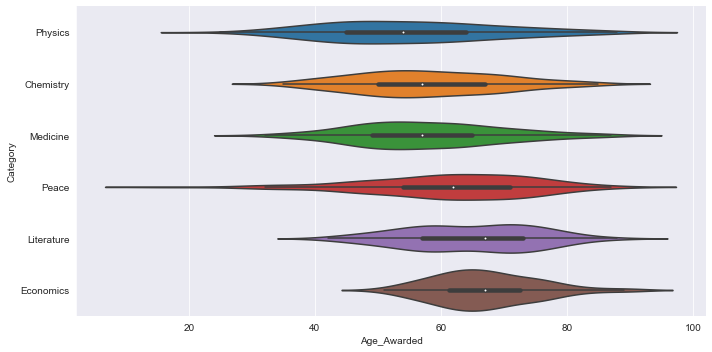

In [52]:
sns.catplot(y='Category', data=df2, x='Age_Awarded',\
               aspect=2, kind='violin')

*****

In [53]:
#Normalize the data set before clustering
df_norm = df3.copy()
df_norm = (df_norm - df_norm.mean()) / df_norm.std()

In [54]:
clu = KMeans(n_clusters=3,random_state=3)
clu.fit(df_norm)

KMeans(n_clusters=3, random_state=3)

In [55]:
df5 = df_norm.copy()
df5['Cluster'] = clu.labels_
df5.groupby('Cluster').mean()

,Age_Awarded,Sex_Female,Sex_Male,Category_Chemistry,Category_Economics,Category_Literature,Category_Medicine,Category_Peace,Category_Physics
Cluster,,,,,,,,,
0,-0.325468,-0.240200,0.240200,-0.492955,-0.311877,-0.383864,-0.561702,-0.364117,1.829665
1,-0.094166,4.158462,-4.158462,-0.335503,-0.238656,0.487049,0.023293,0.671672,-0.446944
2,0.110323,-0.240200,0.240200,0.181767,0.117006,0.084619,0.176264,0.064316,-0.545926


In [56]:
df6 = df3.copy()
df6['Cluster'] = clu.labels_
df6.groupby('Cluster').mean()

,Age_Awarded,Sex_Female,Sex_Male,Category_Chemistry,Category_Economics,Category_Literature,Category_Medicine,Category_Peace,Category_Physics
Cluster,,,,,,,,,
0,55.420000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,58.291667,1.0,0.0,0.062500,0.020833,0.291667,0.250000,0.333333,0.041667
2,60.830428,0.0,1.0,0.267829,0.122029,0.156894,0.315372,0.137876,0.000000


<b>Findings -</b>
Three clusters identified: 55 year-old males, 58 year-old females, 60 year-old males
<li>55 year-old males: Tend to get awarded in Physics category</li>
<li>58 year-old females: Tend to get awarded in Literature or Medicine categories</li>
<li>60 year-old males: Tend to get awarded in Chemistry or Medicine categories</li>


<b>Finding the best clustering method</b>

In [59]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

#using normalized df to find the best clusting method
bestSil = -1
for k in range(2,10):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(df_norm)
        sil = metrics.silhouette_score(df_norm, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_c with k =2: 0.56
Birch(n_cl with k =2: 0.53
Agglomerat with k =2: 0.4897
KMeans(n_c with k =3: 0.5369
Birch() with k =3: 0.5264
Agglomerat with k =3: 0.4691
KMeans(n_c with k =4: 0.4901
Birch(n_cl with k =4: 0.5131
Agglomerat with k =4: 0.47
KMeans(n_c with k =5: 0.4953


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Birch(n_cl with k =5: 0.4943
Agglomerat with k =5: 0.4769
KMeans(n_c with k =6: 0.5028
Birch(n_cl with k =6: 0.4493
Agglomerat with k =6: 0.4577


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_c with k =7: 0.4991
Birch(n_cl with k =7: 0.4576
Agglomerat with k =7: 0.4701
KMeans(n_j with k =8: 0.4686


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Birch(n_cl with k =8: 0.4546
Agglomerat with k =8: 0.4276
KMeans(n_c with k =9: 0.4494
Birch(n_cl with k =9: 0.4388
Agglomerat with k =9: 0.4106


<b>Use the best clustering method</b>

In [60]:
bestCl

KMeans(n_clusters=2, n_jobs=-1)

In [61]:
bestSil

0.5599794384444802

In [63]:
clu = KMeans(n_clusters=2,random_state=3)
clu.fit(df_norm)

KMeans(n_clusters=2, random_state=3)

In [65]:
df6 = df3.copy()
df6['Cluster'] = clu.labels_
df6.groupby('Cluster').mean()

,Age_Awarded,Sex_Female,Sex_Male,Category_Chemistry,Category_Economics,Category_Literature,Category_Medicine,Category_Peace,Category_Physics
Cluster,,,,,,,,,
0,59.528279,0.0,1.0,0.203369,0.092659,0.119134,0.239471,0.104693,0.240674
1,58.291667,1.0,0.0,0.062500,0.020833,0.291667,0.250000,0.333333,0.041667


<b>Findings -</b>
Two clusters identified: 59 year-old males, 58 year-old females
<li>59 year-old males: Tend to get awarded in Physics or Medicine category</li>
<li>58 year-old females: Tend to get awarded in Literature or Medicine categories</li>